# 编程实践：量子模拟器

In [1]:
# Numpy 是一个功能强大的Python库，主要用于对多维数组执行计算。
# Simulator 是模拟器，可以模拟量子计算机的计算过程。
import numpy as np                          # 导入numpy库并简写为np
from mindquantum.simulator import Simulator # 导入模拟器

# Simulator 中维护着一个量子态，初始为|0⟩态。
sim = Simulator('mqvector', 1)  # 实例化'mqvector'模拟器,量子比特数为1
print(sim)                      # 打印模拟器信息

mqvector simulator with 1 qubit (little endian), dtype: mindquantum.complex128.
Current quantum state:
1¦0⟩


In [2]:
# 通过 set_qs() 可以将量子态设置为任意的非零列向量，接口会自动进行归一化。
plus_state = np.array([1, 1])   # 构造¦+⟩态
sim.set_qs(plus_state)          # 将量子态设置为¦+⟩态

quantum_state = sim.get_qs()    # 获取当前量子态
ket = sim.get_qs(ket=True)      # 获取当前量子态的狄拉克符号形式
print('quantum state:', quantum_state)
print('ket:\n', ket)

quantum state: [0.70710678+0.j 0.70710678+0.j]
ket:
 √2/2¦0⟩
√2/2¦1⟩


# 编程实践：量子门

In [3]:
from mindquantum.core.gates import X, Y, H      # 导入量子门
from mindquantum.simulator import Simulator     # 导入模拟器

# 每个量子门都有 matrix() 方法，可以获取该量子门的矩阵形式。
print('Gate name:', X)
gateX = X.matrix()
print(gateX)

Gate name: X
[[0 1]
 [1 0]]


In [ ]:
print('Gate name:', Y)
gateY = Y.matrix()
print(gateY)

In [ ]:
print('Gate name:', H)
gateH = H.matrix()
print(gateH)

In [ ]:
# 调用 Simulator 的 apply_gate() 接口可以将量子门作用在量子比特上，使量子态发生演化。
# on() 方法可以指定量子门作用在哪个量子比特上（目标比特），受哪些比特控制（控制比特）。
sim = Simulator('mqvector', 1)          # 实例化一个模拟器
sim.apply_gate(H.on(0))                 # 将H门作用于q0
print(sim)

# 编程实践：量子线路

In [5]:
from mindquantum.core.gates import X, Y, H   # 导入量子门X, Y, H
from mindquantum.core.circuit import Circuit # 导入Circuit模块，用于搭建量子线路
from mindquantum.simulator import Simulator  # 导入模拟器

# 通过“+=”的方式可以轻松地将量子门添加到量子线路中。
circ = Circuit() 			# 实例化一个量子线路
circ += H.on(0)  			# 在线路上的第0个比特添加一个H门
circ += Y.on(0) 			# 在线路上的第0个比特添加一个Y门
circ += X.on(1) 			# 在线路上的第1个比特添加一个X门

print(circ)

      ┏━━━┓ ┏━━━┓   
q0: ──┨ H ┠─┨ Y ┠───
      ┗━━━┛ ┗━━━┛   
      ┏━━━┓         
q1: ──┨╺╋╸┠─────────
      ┗━━━┛         


In [6]:
mat = circ.matrix() 		# 获取线路对应的矩阵
print('circuit matrix:\n', mat)

circuit matrix:
 [[0.+0.j         0.+0.j         0.-0.70710678j 0.+0.70710678j]
 [0.+0.j         0.+0.j         0.+0.70710678j 0.+0.70710678j]
 [0.-0.70710678j 0.+0.70710678j 0.+0.j         0.+0.j        ]
 [0.+0.70710678j 0.+0.70710678j 0.+0.j         0.+0.j        ]]


In [7]:
# 调用 Simulator 的 apply_circuit() 接口可以将量子线路作用在量子比特上，使量子态发生演化。
sim = Simulator('mqvector', 2)  	# 实例化一个两比特的模拟器
sim.apply_circuit(circ)          	# 作用量子线路
print(sim)

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
-√2/2j¦10⟩
√2/2j¦11⟩


# 编程实践：量子测量

In [8]:
from mindquantum.core.gates import Measure, H, X, Y # 导入量子门X, Y, H和量子测量Measure
from mindquantum.core.circuit import Circuit        # 导入Circuit模块，用于搭建量子线路
from mindquantum.simulator import Simulator         # 导入模拟器

circ = Circuit()                    # 实例化一个量子线路
circ += H.on(0)                     # 在线路上的第0个比特添加一个H门
circ += Y.on(0)                     # 在线路上的第0个比特添加一个Y门
circ += X.on(1)                     # 在线路上的第1个比特添加一个X门

# Measure 与量子门类似，可以用“+=”的方式添加到量子线路中，用 on() 方法指定目标比特。
circ += Measure().on(0)             # 在线路上的第0个比特添加一个测量
circ += Measure().on(1)             # 在线路上的第1个比特添加一个测量

print(circ)

      ┏━━━┓ ┏━━━┓ ┍━━━━━━┑   
q0: ──┨ H ┠─┨ Y ┠─┤ M q0 ├───
      ┗━━━┛ ┗━━━┛ ┕━━━━━━┙   
      ┏━━━┓ ┍━━━━━━┑         
q1: ──┨╺╋╸┠─┤ M q1 ├─────────
      ┗━━━┛ ┕━━━━━━┙         


In [9]:
# 调用 Simulator 的 sampling() 接口可以对某一线路的演化结果进行多次采样，获得量子测量的统计结果。
# 这一过程与真实量子计算机的运行方式相似。
sim = Simulator('mqvector', 2)              # 实例化一个两比特的模拟器
result = sim.sampling(circ, shots=1000) 	# 对该线路的演化结果进行1000次采样
print(result)

shots: 1000
Keys: q1 q0│0.00   0.127       0.255       0.382       0.509       0.636
───────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
         10│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
           │
         11│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
           │
{'10': 491, '11': 509}


## Pauli-X 门


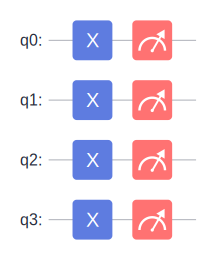

In [10]:
circ = Circuit()
for i in range(4):
    circ += X.on(i)
circ.measure_all()
circ.svg()

In [11]:
sim = Simulator("mqvector", 4)
res = sim.sampling(circ, shots=1024)
print(res)

shots: 1024
Keys: q3 q2 q1 q0│0.00     0.2         0.4         0.6         0.8         1.0
─────────────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
             1111│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
                 │
{'1111': 1024}


## Pauli-Z 门

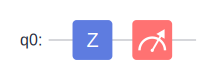

In [12]:
from mindquantum import Z

circ = Circuit()
circ += Z.on(0)
circ.measure_all()
circ.svg()

In [13]:
sim = Simulator("mqvector", 1)
res = sim.sampling(circ, shots=1024)
print(res)

shots: 1024
Keys: q0│0.00     0.2         0.4         0.6         0.8         1.0
────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
       0│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
        │
{'0': 1024}


## Pauli-Y 门

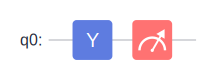

In [14]:
circ = Circuit()
circ += Y.on(0)
circ.measure_all()
circ.svg()

In [19]:
sim = Simulator("mqvector", 1)
res = sim.sampling(circ, shots=1024)
print(res)

shots: 1024
Keys: q0│0.00     0.2         0.4         0.6         0.8         1.0
────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
       1│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
        │
{'1': 1024}


## Hadamard 门

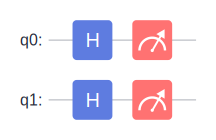

In [20]:
circ = Circuit()
circ += H.on(0)
circ += H.on(1)
circ.measure_all()
circ.svg()

In [21]:
sim = Simulator("mqvector", 2)
res = sim.sampling(circ, shots=1024)
print(res)

shots: 1024
Keys: q1 q0│0.00   0.066       0.131       0.197       0.263       0.328
───────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
         00│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
           │
         01│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
           │
         10│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
           │
         11│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
           │
{'00': 269, '01': 255, '10': 259, '11': 241}


## 旋转门

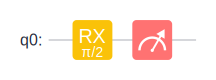

In [22]:
from mindquantum import RX
import numpy as np

circ = Circuit()
circ += RX(np.pi / 2).on(0)
circ.measure_all()
circ.svg()

In [23]:
sim = Simulator("mqvector", 1)
res = sim.sampling(circ, shots=1024)
print(res)

shots: 1024
Keys: q0│0.00   0.126       0.251       0.377       0.503       0.629
────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
       0│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
        │
       1│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
        │
{'0': 509, '1': 515}


## CNOT 门

In [ ]:
circ = Circuit()
circ += X.on(0)
circ += X.on(1, 0)
circ.measure_all()
circ.svg()

In [ ]:
sim = Simulator("mqvector", 2)
res = sim.sampling(circ, shots=1024)
print(res)

# 编程实践：量子近似优化算法

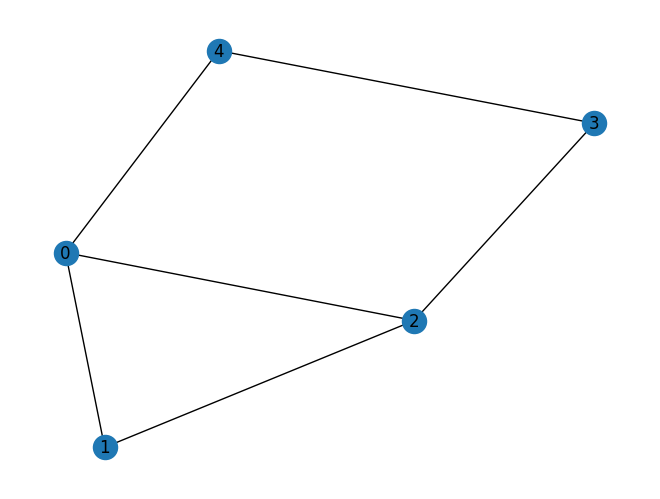

In [26]:
from mindquantum.algorithm import MaxCutAnsatz
from mindquantum.core.operators import Hamiltonian, QubitOperator
from mindquantum.framework import MQAnsatzOnlyLayer
import networkx as nx
import mindspore.nn as nn

# 构造待求解图
graph = nx.Graph([(0, 1), (1, 2), (2, 3), (3, 4), (0, 4), (0, 2)])
nx.draw(graph, with_labels=True)

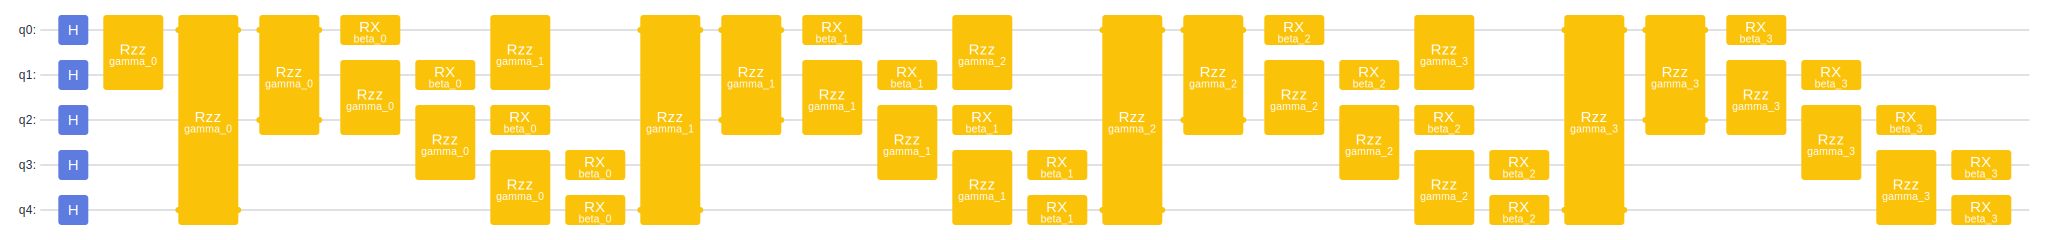

In [27]:
# 将图转化为目标哈密顿量
pauli_ops = QubitOperator()
for i in graph.edges:
    pauli_ops += QubitOperator(f'Z{i[0]} Z{i[1]}')
ham = Hamiltonian(pauli_ops)

# 构造线路
circ = MaxCutAnsatz(list(graph.edges), depth=4).circuit
circ.svg()

In [28]:
# 创建模拟器，backend使用‘mqvector’，能模拟5个比特（'circ'线路中包含的比特数）
sim = Simulator("mqvector", 5)

# 生成计算变分量子线路的期望值和梯度的算子
grad_ops = sim.get_expectation_with_grad(ham, circ)

# 生成待训练的神经网络
net = MQAnsatzOnlyLayer(grad_ops)

# 设置针对网络中所有可训练参数、学习率为0.05的Adam优化器
opti = nn.Adam(net.trainable_params(), learning_rate=0.05)

# 生成能对神经网络进行一步训练的算子
train_net = nn.TrainOneStepCell(net, opti)

for i in range(200):

    # 将神经网络训练一步并计算得到的结果（切割边数）。注意：每当'train_net()'运行一次，神经网络就训练了一步
    cut = (len(graph.edges) - train_net()) / 2

    # 每训练10步，打印当前训练步数和当前得到的切割边数
    if i % 10 == 0:
        print("train step:", i, ", cut:", cut)

train step: 0 , cut: [2.9964044]
train step: 10 , cut: [3.1222312]
train step: 20 , cut: [4.3040967]
train step: 30 , cut: [4.6817555]
train step: 40 , cut: [4.801783]
train step: 50 , cut: [4.811452]
train step: 60 , cut: [4.8293753]
train step: 70 , cut: [4.8410363]
train step: 80 , cut: [4.848216]
train step: 90 , cut: [4.8525696]
train step: 100 , cut: [4.85596]
train step: 110 , cut: [4.858878]
train step: 120 , cut: [4.8621645]
train step: 130 , cut: [4.865763]
train step: 140 , cut: [4.8695602]
train step: 150 , cut: [4.8734875]
train step: 160 , cut: [4.877423]
train step: 170 , cut: [4.881181]
train step: 180 , cut: [4.8845415]
train step: 190 , cut: [4.8872995]


# 作业1

1. 请搭建出如下线路。
2. 请打印线路运行后的量子态。
3. 请在线路末尾添加测量，并采样线路运行结果10000次，观察得到的分布。


<img src="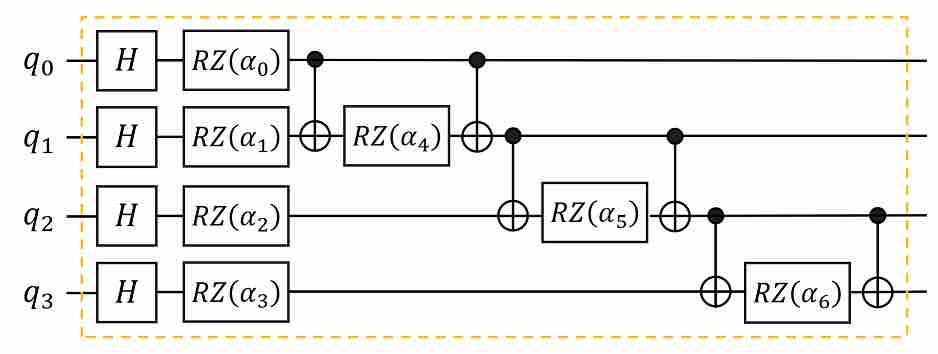
" width="400"/>

其中 $\alpha_0, \alpha_1, ⋯, \alpha_6$ 可以是任意值。

**预期结果：** 对于随意的 $\alpha_0, \alpha_1, ⋯, \alpha_6$ ，运行线路后的量子态应该难以发现规律，但添加测量后采样10000次的统计结果却是近似均匀分布。

**解释：** 该线路是IQP编码线路，可以将经典信息编码到量子态上。当选取RZ⻔时，RZ⻔只会改变相位信息，而不会改变振幅信息，即 $\alpha_0, \alpha_1, ⋯, \alpha_6$ 的信息将被编码至相位上。量子态中包含了振幅和相位的完整信息，因此难以发现规律；而采样得到的分布只与量子态的振幅有关，因此呈现均匀分布。

**请在标记为`#TODO`的位置完成代码编写，并将包裹代码的多行注释符`""" """`删除。每个TODO位置需要根据注释说明实现相应功能。**

In [62]:
from mindquantum.core.gates import H, X, RZ
from mindquantum.core.circuit import *
from mindquantum.simulator import Simulator

template = Circuit([X(1,0),RZ('alpha').on(1),X(1,0)])
circ = UN(H,4) +(RZ(f'alpha_{i}').on(i) for i in range(4)) + sum(add_suffix(shift(template,i), f'{i+4}') for i in range(3))
circ.svg()
# TODO: 使用模拟器运行线路，打印运行后的量子态
sim = Simulator('mqvector', circ.n_qubits)
prs = {
    f'alpha_{i}': 0.5 for i in range(7)
}
sim.apply_circuit(circ,pr=prs)
print(sim.get_qs(True))

# TODO: 使用模拟器采样线路结果10000次
sim = Simulator('mqvector', circ.n_qubits)
circ = circ + (Measure().on(i) for i in range(4))
res = sim.sampling(circ,pr=prs,shots=10000)
print(res)


(-0.04456151391237308-0.24599648671848418j)¦0000⟩
(0.18292221721845522-0.1704096900058336j)¦0001⟩
(0.24222810542766124-0.06185098981363075j)¦0010⟩
(0.24222810542766124-0.061850989813630755j)¦0011⟩
(0.2422281054276612-0.061850989813630755j)¦0100⟩
(0.18292221721845522+0.1704096900058336j)¦0101⟩
(0.24222810542766124+0.06185098981363075j)¦0110⟩
(0.24222810542766118+0.06185098981363074j)¦0111⟩
(0.18292221721845517-0.17040969000583353j)¦1000⟩
(0.24222810542766124+0.06185098981363075j)¦1001⟩
(0.18292221721845522+0.1704096900058336j)¦1010⟩
(0.18292221721845522+0.17040969000583356j)¦1011⟩
(0.24222810542766124-0.06185098981363075j)¦1100⟩
(0.18292221721845517+0.17040969000583356j)¦1101⟩
(0.2422281054276612+0.06185098981363075j)¦1110⟩
(0.24222810542766113+0.06185098981363077j)¦1111⟩
shots: 10000
Keys: q3 q2 q1 q0│0.00   0.016       0.033       0.049       0.065       0.082
─────────────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
             0000│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒

# 作业2：使用VQE算法计算氢分子的势能曲线

在本作业中，我们将使用变分量子本征求解器(VQE)算法来计算氢分子的势能曲线。具体步骤：

1. 使用给定的`get_H2_ham()`函数，根据不同的键长生成氢分子的哈密顿量。
2. 构建如下图所示的量子线路，并优化其参数以最小化哈密顿量的期望值。
3. 通过遍历不同的键长(0.5-1.1埃米)，计算对应的基态能量，绘制势能曲线。
4. 将VQE计算结果与完全组态相互作用(FCI)和Hartree-Fock(HF)方法的结果进行对比。

势能曲线展示了氢分子的基态能量如何随着两个氢原子间距离变化。曲线的最低点对应平衡键长，此时分子最稳定。当原子距离偏离平衡位置时，能量会升高：距离过小时由于核间排斥能量升高，距离过大时分子趋向解离。通过分析势能曲线，我们可以研究分子的稳定性、结合能和平衡构型等重要性质。

在这里，我们将VQE的结果与两种经典计算方法进行对比：
- 完全组态相互作用(FCI)方法：这是一种精确的量子化学计算方法，考虑了所有可能的电子组态，能得到最准确的结果，但计算成本随系统大小呈指数增长。FCI的结果将作为我们的参考标准。
- Hartree-Fock(HF)方法：这是一种近似方法，通过平均场近似来处理电子间的相互作用。HF方法计算速度快，但准确度较低，特别是在描述强关联体系时。

**请在标记为`#TODO`的位置完成代码编写，并将包裹代码的多行注释符`""" """`删除。每个TODO位置需要根据注释说明实现相应功能。**

> 注意： `openfermion`和`openfermionpyscf`仅支持Linux和MacOS，如果没有合适的环境，可以访问HiQ量子云平台中的Jupyter Lab服务。



<img src="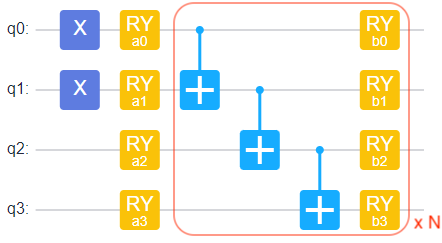
" width="400"/>

*Hartree-Fork + Hardware Efficient Ansatz*

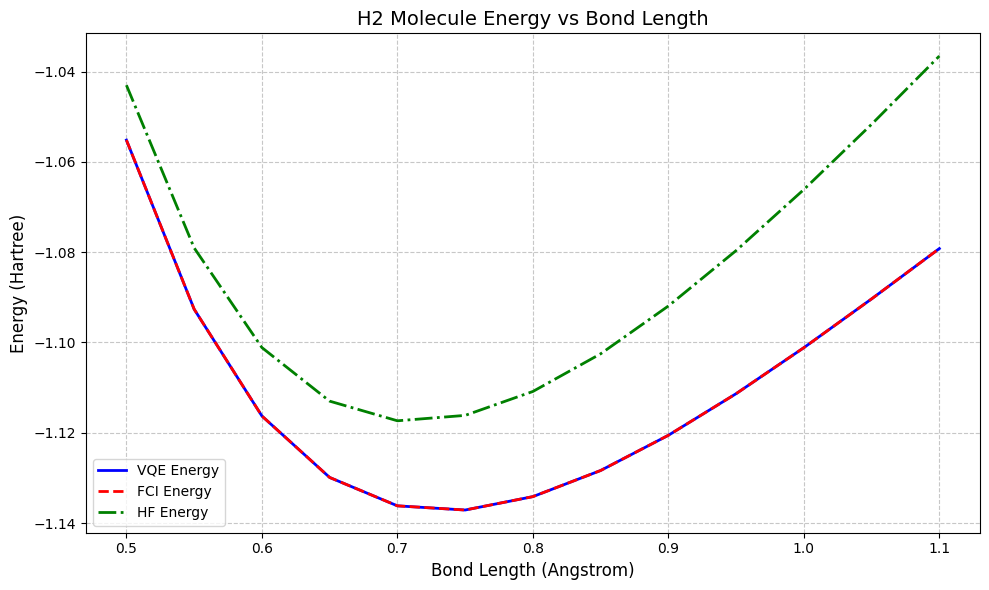

In [67]:
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf
from mindquantum.core.operators import Hamiltonian
from mindquantum.algorithm import get_qubit_hamiltonian, HardwareEfficientAnsatz
from mindquantum.core.gates import X, H, RY
from mindquantum.core.circuit import Circuit
from mindquantum.simulator import Simulator
from mindquantum.framework import MQAnsatzOnlyLayer
import mindspore.nn as nn
from matplotlib import pyplot as plt


def get_H2_ham(d):
    """
    根据键长生成H2分子哈密顿量
    Args:
        d (float): 键长，单位埃米
    Returns:
        Hamiltonian: H2分子哈密顿量
    """
    mol = MolecularData([("H", (0, 0, 0)), ("H", (0, 0, d))], "sto3g", multiplicity=1)
    mol = run_pyscf(mol, run_fci=1)
    return Hamiltonian(get_qubit_hamiltonian(mol)), mol.fci_energy, mol.hf_energy

# TODO: 请根据图中所示构建量子线路
template = Circuit() + X(1,0)+X(2,1)+X(3,2)+(RY(f'ß_{i}').on(i) for i in range(4))
circ = Circuit() +X(0)+X(1)+(RY(f'alpha_{i}').on(i) for i in range(4)) + template


# Initialize lists to store results
distances = [i/20 for i in range(10, 23)]  # From 0.5 to 1.1 Angstrom with 0.05 step
energies = []
fci_energies = []
hf_energies = []

# Create simulator
sim = Simulator('mqvector', 4)

for d in distances:
    # Calculate Hamiltonian for current distance
    ham, fci_energy, hf_energy = get_H2_ham(d)

    fci_energies.append(fci_energy)
    hf_energies.append(hf_energy)

    # TODO: 获取期望值和梯度算子
    grad_ops = sim.get_expectation_with_grad(ham, circ)

    # TODO: 生成待训练的神经网络
    model = MQAnsatzOnlyLayer(grad_ops)
    # TODO: 设置优化器
    optim_ops = nn.Adam(model.trainable_params(),learning_rate=0.5)
    # TODO: 生成能对神经网络进行一步训练的算子
    train_net = nn.TrainOneStepCell(model, optim_ops)

    # 对网络进行200步训练
    for i in range(200):
        train_net()

    # 获取第201步训练后的网络的输出，并将其添加到energies列表中
    energies.append(train_net().asnumpy())

# Plot results
plt.figure(figsize=(10, 6))
if energies:
    plt.plot(distances, energies, 'b-', label='VQE Energy', linewidth=2)
plt.plot(distances, fci_energies, 'r--', label='FCI Energy', linewidth=2)
plt.plot(distances, hf_energies, 'g-.', label='HF Energy', linewidth=2)
plt.xlabel('Bond Length (Angstrom)', fontsize=12)
plt.ylabel('Energy (Hartree)', fontsize=12)
plt.title('H2 Molecule Energy vs Bond Length', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
